# STOR 320 Homework 5: Visualization and Linear Regression

Please submit the solution to gradescope by 11:59 PM, Nov 7, Thursday.

**Name**: Ivy Nangalia

**PID**: 730670491


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem 1. (5 points). 

A random walk is a mathematical concept that describes a path consisting of a series of random steps. A random walk progresses in discrete steps. In each step, the position either increases or decreases by a certain amount, typically +1 or -1.

- 1.1 Generate 10 random walks, each starting at 0 and having 100 steps. Each step should be randomly either -1 or +1. Store each random walk as a separate line in a 2D array or list. Set random seed as `42`. (3 points)
- 1.2 Visualize the 10 random walks in a single plot. Each random walk should have its own color and be labeled as Walk 1, Walk 2, ..., Walk 10. (2 points)

In [2]:
#1.1
np.random.seed(42)

walks = np.cumsum(np.random.choice([-1, 1], size=(10, 100)), axis=1)
walks[0]

array([-1,  0, -1, -2, -3, -2, -3, -4, -5, -4, -5, -6, -7, -8, -7, -8, -7,
       -6, -5, -6, -5, -6, -5, -4, -3, -2, -1,  0,  1,  2,  1,  0,  1,  2,
        3,  2,  3,  2,  1,  0, -1, -2, -1,  0,  1,  2,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  5,  4,  3,  2,  1,  0, -1, -2, -3, -2, -1, -2,
       -1,  0,  1,  2,  1,  2,  1,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,
        2,  3,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 12])

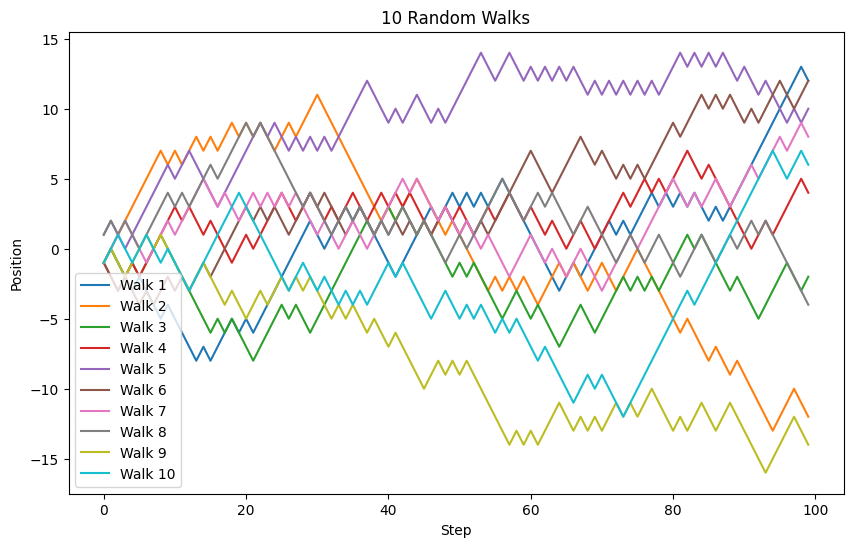

In [3]:
plt.figure(figsize=(10, 6))
for i in range(0,10):
    plt.plot(walks[i], label=f'Walk {i+1}')

plt.xlabel('Step')
plt.ylabel('Position')
plt.title('10 Random Walks')
plt.legend()
plt.show()

## Problem 2. Recreate the  ``pd.get_dummies()`` function from stratch. (20 points). 

- 2.1 Write a function called `convert_to_binary` **from scratch** that takes a pandas DataFrame of categorical features and returns a DataFrame where each feature is converted into multiple binary columns.  (8 points)

* Each binary column should represent a feature-category combination.
* The column names should follow the format feature_category. For example, if the feature `Color` has values `E`, `I`, and `J`, the new columns should be `Color_E`, `Color_I`, and `Color_J`.

- 2.2 Apply the `convert_to_binary` to the `Color` and `Cut` columns in `diamonds-new.csv`. Print the converted dataframe. (4 points)

- 2.3 Apply the `pd.get_dummies()` function to the same dataset, and check if the output of `convert_to_binary` is the same as `pd.get_dummies()`. (8 points)

**Hint:** Use `np.allclose` to check if the outputs are the same.


In [4]:
def convert_to_binary(df):
    binary_df = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype == 'object':
            categories = sorted(df[column].unique())
            for category in categories:
                binary_column = f"{column}_{category}"
                binary_df[binary_column] = (df[column] == category)#.astype(int)
        else:
            binary_df[column] = df[column]
    return binary_df

In [5]:
diamonds_new = pd.read_csv("diamonds-new.csv")

In [6]:
diamonds_binary = convert_to_binary(diamonds_new)
diamonds_binary.head()

,Carat,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Premium,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,depth,table,Price,x,y,z
0,0.23,False,False,True,False,False,False,True,False,False,...,False,False,False,False,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,False,False,False,True,False,False,True,False,False,...,False,False,False,False,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,False,True,False,False,False,False,True,False,False,...,True,False,False,False,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,False,False,False,True,False,False,False,False,False,...,False,True,False,False,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,False,True,False,False,False,False,False,False,False,...,False,False,False,False,63.3,58.0,335.0,4.34,4.35,2.75


In [7]:
dummies = pd.get_dummies(diamonds_new)

In [8]:
# ran into an error, checking boolean values 
dummies_bool = dummies.select_dtypes(bool)
diamonds_binary_bool = diamonds_binary.select_dtypes(bool)

np.allclose(dummies_bool, diamonds_binary_bool)

True

# Problem 3: Simple linear regression with `penguins` dataset (15 points)

The dataset `penguins`contains measurements for different penguin species. The dataset includes the following relevant columns:

- bill_length_mm: Length of the penguin's bill in millimeters.

- bill_depth_mm: Depth of the penguin's bill in millimeters.

- species: Species of the penguin (e.g., Adelie, Gentoo, Chinstrap).

* **3.1** Create a scatter plot with a linear regression line for the entire dataset. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (3 points)

* **3.2** Based on your plot, describe the relationship between bill length and bill depth. What is the meaning of the slope of the line in the plot? (3 points)

* **3.3** Create a similar scatter plot with a linear regression line grouping by species. X-axis is the `bill_length_mm` and y-axis is the `bill_depth_mm`. (4 points)

* **3.4** Based on your plot, describe the relationship between bill length and bill depth. Describe the differences of plots between 3.1 and 3.3 (5 points)

In [9]:
#penguins = sns.load_dataset("penguins")
# had a hard time downloading penguins using sns, reading csv instead
penguins = pd.read_csv("penguins.csv")

In [10]:
all_columns = "+".join(penguins.columns.difference(["bill_depth_mm"]))
formula = "bill_depth_mm~" + all_columns +'-1'
mod = smf.ols(formula=formula,data=penguins).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     215.5
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.35e-125
Time:                        20:07:48   Log-Likelihood:                -390.67
No. Observations:                 333   AIC:                             799.3
Df Residuals:                     324   BIC:                             833.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
island[Biscoe]          10.9754      1.482      7.407      0.000       8.060      13.890
island[Dream]           10.8373      1.486      7.292      0.000       7.913      13.761
island[Torgersen]       11.0122      1.502      7.332      0.000       8.057      13.967
sex[T.MALE]              0.8932      0.136      6.546      0.000       0.625       1.162
species[T.Chinstrap]    -0.3343      0.246     -1.357      0.176      -0.819       0.150
species[T.Gentoo]       -4.9585      0.300    -16.548      0.000      -5.548      -4.369
bill_length_mm           0.0384      0.020      1.945      0.053      -0.000       0.077
body_mass_g              0.0005      0.000      3.409      0.001       0.000       0.001
flipper_length_mm        0.0188      0.008      2.239      0.026       0.002       0.035
==============================================================================
Omnibus:                        6.193   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.993
Skew:                           0.288   Prob(JB):                       0.0500
Kurtosis:                       3.316   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

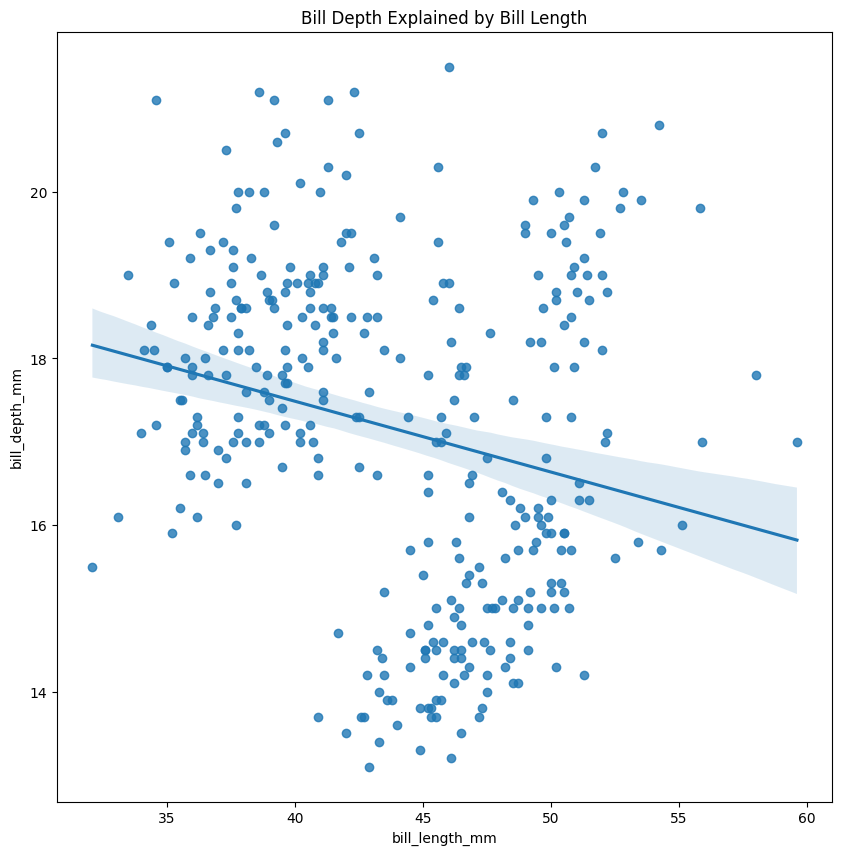

In [11]:
#3.1
plt.figure(figsize=(10,10))
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=penguins)
plt.title("Bill Depth Explained by Bill Length")
plt.show()

Although there is a linear trend between bill length and depth, there does not appear to be a relationship between bill depth and length. The slope of the line indicates the line of "best fit", as in, the average decrease in bill depth for every millimeter increase in bill length.

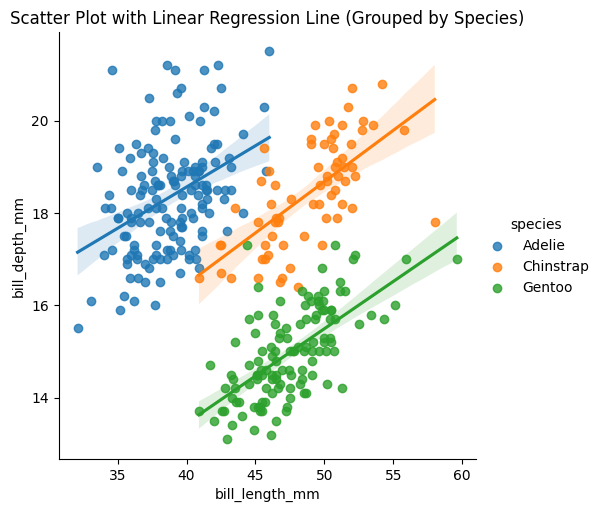

In [12]:
#3.3
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins)
plt.title("Scatter Plot with Linear Regression Line (Grouped by Species)")
plt.show()

It seems that when grouping by species, the regression lines better fit the trends of the data. This conformity implies that bill depth and length are positively correlated for every species, but do not have the same correlation across species. Put another way, each species has its own regression line. The grouping caused different linear trends to emerge, specifically that bill depth tends to increase as bill length increases –– contrary to the findings in 3.1. The graph produced in 3.3 is much accurate and better at predicting bill depth than 3.1.

# Problem 4: Linear regression with `diamonds-new.csv`. (60 points)

* 4.1 Read the `diamonds-new.csv`, check if there is any missing value. How many missing values are there? (3 points)
* 4.2 Remove the rows with missing values. Check if there is any missing value in the new table. (2 points)
* 4.3 Create a histgram of the price distribution. What do you observe?  (5 points)
* 4.4 Create a scatter plot between `Price` and `Carat`, grouping by the level of `Cut`. What difference do you observe for different `Cut` levels? Do you observe a linear trend? (5 points)

* 4.5 Create a scatter plot between `Price` and `depth`, grouping by the level of `Cut`. Do you observe a linear trend? (5 points)

* 4.6 Create a barplot between `Price` and `Color`, grouping by the level of `Cut`. Which type of `Color` and `Cut` combination has the largest average price? (5 points)

* 4.7 Use `train_test_split` to split the whole dataset into training set and testing set, according to the ratio 80% and 20%. How many rows in the training set? How many rows in the test set? (5 points)

* 4.8 Build a linear regression model to predict the prices based on all other columns. What is the value of in-sample R-squared?  (5 points)

* 4.9 Calculate the VIF values for each column within `['Carat', 'depth', 'table', 'x', 'y', 'z']`. Is there any multicollinearity within these columns? (5 points)

* 4.10 Remove proper columns within `['Carat', 'depth', 'table', 'x', 'y', 'z']` based on the values of VIF. (5 points)

* 4.11 Build a new linear regression model using the selected columns in 4.10. What is the value of in-sample R-squared? Write down the math formulation for predicting the price of a diamonds based on the coefficient in this model. (5 points)

* 4.12 Calculate the out-of-sample R-squared for the model in 4.11. (5 points)

* 4.13 Visualize the prediction error as a function of the predicted prices. Add a horizontal line representing residual = 0. What do you observe? (5 points)



In [13]:
diamonds = pd.read_csv("diamonds-new.csv")

In [14]:
#4.1
missing_values = diamonds.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")

Total missing values: 4


In [15]:
#4.2
diamonds = diamonds.dropna()

In [16]:
missing_values = diamonds.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


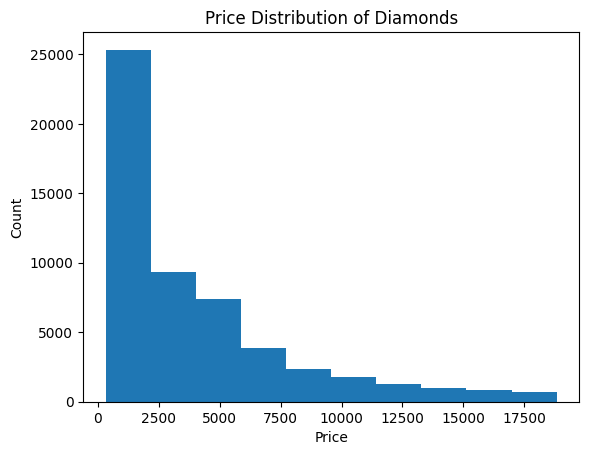

In [17]:
#4.3
plt.hist(diamonds["Price"])
plt.title("Price Distribution of Diamonds")
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

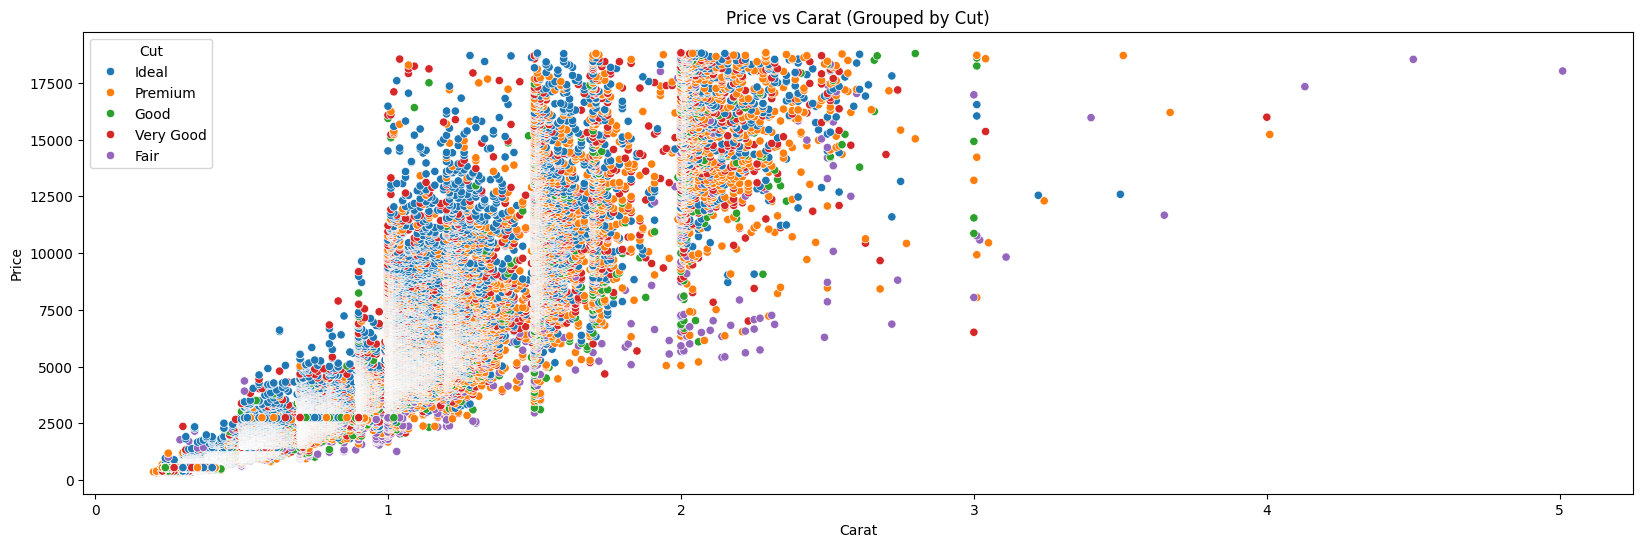

In [18]:
#4.4
plt.figure(figsize=(20, 6))
sns.scatterplot(x="Carat", y="Price", hue="Cut", data=diamonds)
plt.title("Price vs Carat (Grouped by Cut)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()


It seems like there's a linear trend between Price and Carats, without much influence from the cut. Perhaps it's easier to predict using the cut but generally it seems that as carats increase, price also increases, which makes sense intuitively. Larger diamonds should cost more.

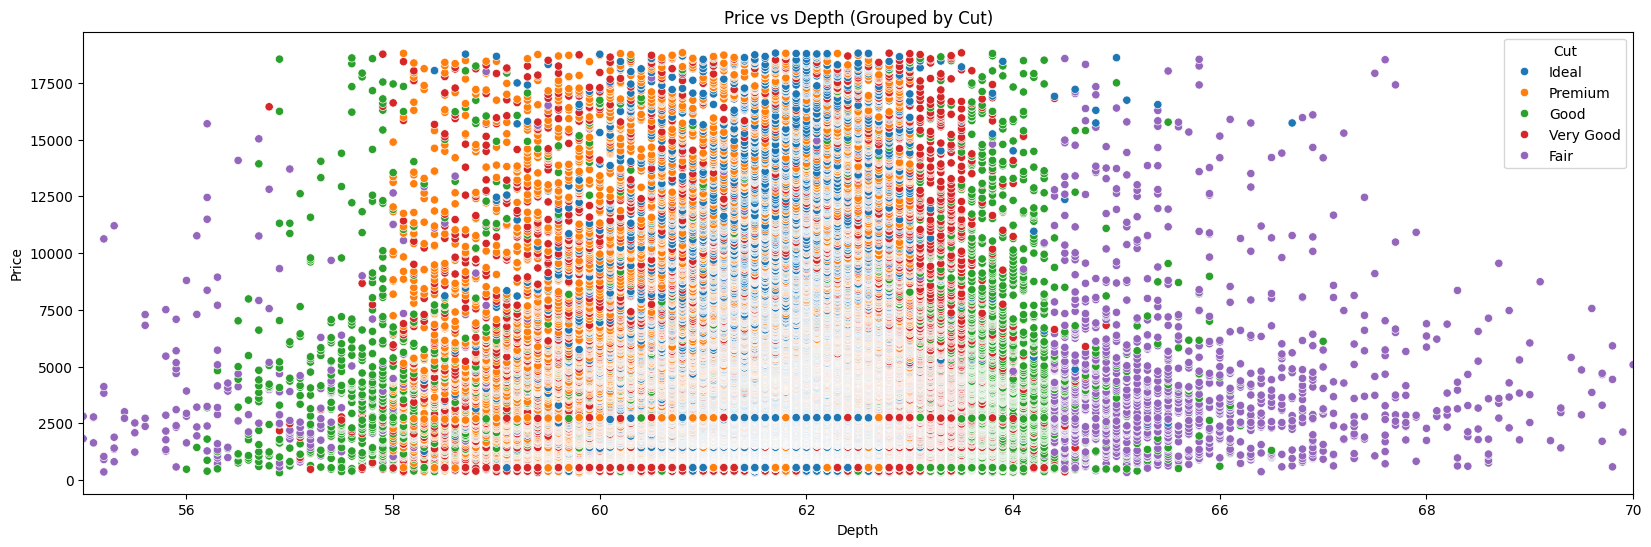

In [19]:
#4.5
plt.figure(figsize=(20, 6))
sns.scatterplot(x="depth", y="Price", hue="Cut", data=diamonds)
plt.title("Price vs Depth (Grouped by Cut)")
plt.xlim(55,70) # visualizing the majority of the data
plt.xlabel("Depth")
plt.ylabel("Price")
plt.show()

There doesn't appear to be any linear trends with the data, it just seems normally distributed

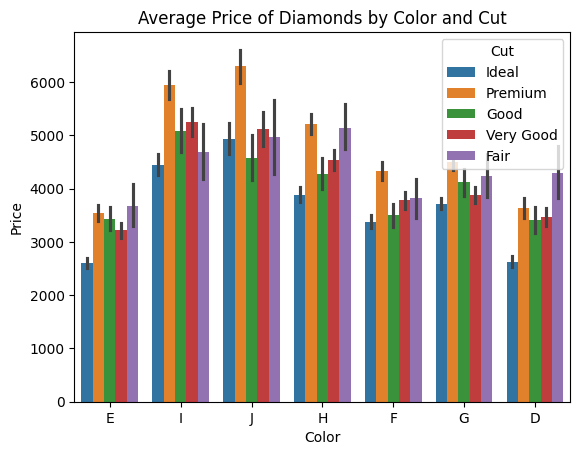

In [20]:
#4.6
sns.barplot(x="Color", y="Price", hue="Cut", data=diamonds)
plt.title("Average Price of Diamonds by Color and Cut")
plt.show()

It seems that Premium diamonds of color J have the largest average price.

In [21]:
#4.7
diamonds_train, diamonds_test = train_test_split(diamonds, test_size=0.2, random_state=42)
len(diamonds_train), len(diamonds_test)

(43148, 10788)

In [148]:
#4.8
all_columns = "+".join(diamonds_train.columns.difference(["Price"]))
formula = "Price~" + all_columns +'-1'
mod = smf.ols(formula=formula,data=diamonds_train).fit()
print(f"R2 = {mod.rsquared}")

R2 = 0.917215815077376


In [22]:
#4.9
columns = ['Carat', 'depth', 'table', 'x', 'y', 'z']
for i in range(0, len(columns)):
    print(f"VIF of {columns[i]} = {variance_inflation_factor(diamonds_train[columns], i)}")

VIF of Carat = 70.2972588045807
VIF of depth = 506.94872405185356
VIF of table = 494.5148862356101
VIF of x = 1267.0888081251753
VIF of y = 545.867416423977
VIF of z = 468.2185131382021


seems like there's a lot of multicollinearity, anything with a VIF>5 is quite high.

In [23]:
#4.10
diamonds_train = diamonds_train.drop("x", axis=1)

In [24]:
columns = ['Carat', 'depth', 'table', 'y', 'z']
for i in range(0, len(columns)):
    print(f"VIF of {columns[i]} = {variance_inflation_factor(diamonds_train[columns], i)}")

VIF of Carat = 51.013874032155
VIF of depth = 506.76040501790834
VIF of table = 435.97651701813055
VIF of y = 350.6882481200804
VIF of z = 376.8530713427753


In [25]:
diamonds_train = diamonds_train.drop("depth", axis=1)

In [26]:
columns = ['Carat', 'table', 'y', 'z']
for i in range(0, len(columns)):
    print(f"VIF of {columns[i]} = {variance_inflation_factor(diamonds_train[columns], i)}")

VIF of Carat = 41.92358071033758
VIF of table = 137.1411836227726
VIF of y = 350.64359471150425
VIF of z = 310.29158018199985


In [27]:
diamonds_train = diamonds_train.drop("y", axis=1)

In [28]:
columns = ['Carat', 'table', 'z']
for i in range(0, len(columns)):
    print(f"VIF of {columns[i]} = {variance_inflation_factor(diamonds_train[columns], i)}")

VIF of Carat = 31.7223631361449
VIF of table = 100.59842427121707
VIF of z = 214.97552629167828


In [30]:
diamonds_train = diamonds_train.drop("z", axis=1)

In [31]:
columns = ['Carat', 'table']
for i in range(0, len(columns)):
    print(f"VIF of {columns[i]} = {variance_inflation_factor(diamonds_train[columns], i)}")

VIF of Carat = 3.900079647930688
VIF of table = 3.900079647930639


In [41]:
#4.11
model = smf.ols("Price ~ Carat + table", data = diamonds_train).fit()
model.rsquared

0.8501611882175852

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.224e+05
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:12:50   Log-Likelihood:            -3.7818e+05
No. Observations:               43148   AIC:                         7.564e+05
Df Residuals:                   43145   BIC:                         7.564e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1864.0999    193.237      9.647      0.000    1485.351    2242.849
Carat       7822.4531     15.967    489.921      0.000    7791.158    7853.748
table        -72.5117      3.394    -21.364      0.000     -79.164     -65.859
==============================================================================
Omnibus:                    11280.854   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137267.090
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                      11.545   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\hat{y} = 1864.0999 + 7822.4531\beta_1 - 72.5117\beta_2$$

In [43]:
#4.12

def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [46]:
y_train = diamonds_train["Price"]
y_test = diamonds_test["Price"]
y_pred = model.predict(diamonds_test)

OSR2(y_train, y_test, y_pred)

0.8544465556805251

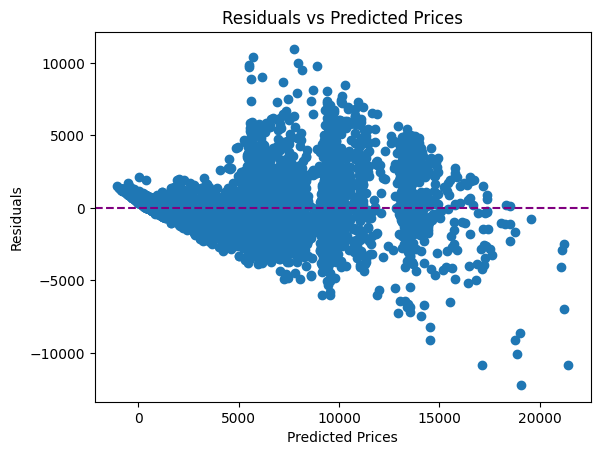

In [53]:
#4.13

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="purple", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()


It seems that prices get a lot more variable as they increase, however it seems that the model tends to overprice more expensive diamonds.